In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import folium

data = pd.read_csv("./source/subway.csv")

data.head()


,month,line,station,in0405,out0405,in0506,out0506,in0607,out0607,in0708,...,in2324,out2324,in0001,out0001,in0102,out0102,in0203,out0203,in0304,out0304
0,202211,1호선,동대문,728,4,10942,1871,8782,6391,14368,...,4294,7946,518,2191,5,206,0,1,0,0
1,202211,1호선,동묘앞,205,4,3082,1052,3731,4674,6555,...,1230,3580,89,1322,2,332,0,1,0,0
2,202211,1호선,서울역,698,24,8634,8662,13165,49665,42055,...,22735,13413,2321,2639,2,192,0,0,0,0
3,202211,1호선,시청,121,0,2050,4369,3391,23225,7286,...,10081,3194,872,850,1,26,0,0,0,0
4,202211,1호선,신설동,372,15,9256,2278,9260,8707,20784,...,3316,7874,370,2070,1,6,0,0,0,0


    line      station      sum
52   2호선     잠실(송파구청)  4444219
10   2호선           강남  4396273
59   2호선         홍대입구  3926610
14   2호선      구로디지털단지  3318342
37   2호선           신림  3298774
26   2호선     삼성(무역센터)  3110159
43   2호선           역삼  2995101
2    1호선          서울역  2990542
30   2호선           선릉  2934854
36   2호선          신도림  2918659
63   3호선        고속터미널  2776977
28   2호선  서울대입구(관악구청)  2729828
50   2호선        을지로입구  2596239
354  경부선          영등포  2482440
25   2호선           사당  2460193
350  경부선           수원  2403662
357  경부선           용산  2375380
215  7호선      가산디지털단지  2359191
31   2호선           성수  2300310
40   2호선           신촌  2259527


/var/folders/h0/gfsk3sp94vv5t9xvrt41ns080000gn/T/ipykernel_1420/3570043391.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 3000000.0, '3,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 5000000.0, '5,000,000')]

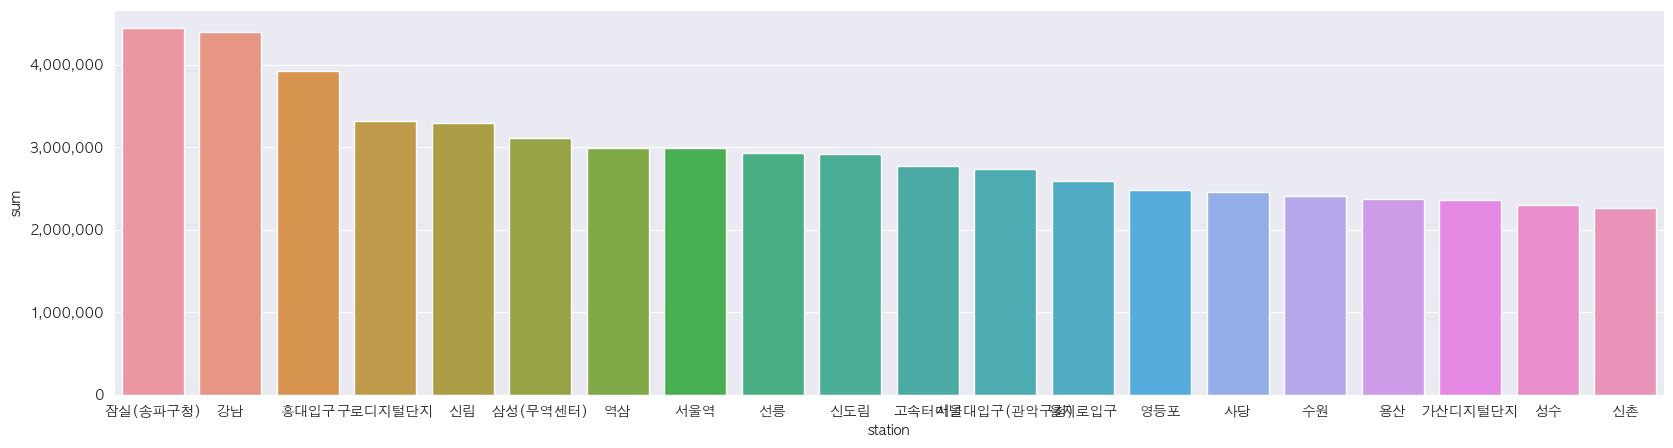

In [30]:
# 역별 승하차 인원

# 각 row의 승하차 인원을 합산
data['sum'] = data.apply(lambda x: x.loc['in0405':'out0304'].sum(), axis=1)

# 승하차 인원 내림차순별 정렬
descending_sorted = data.loc[data['month'] == 202211, ['line', 'station', 'sum']].sort_values('sum', ascending=False).head(20)
print(descending_sorted)

# 그래프 폰트, 사이즈 설정
plt.rcParams['font.family'] = "AppleGothic"
plt.figure(figsize=(20, 5))

# 그래프 작성
plot = sns.barplot(descending_sorted, x='station', y='sum')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


In [42]:
seoul_map=folium.Map(location=[37.5642135, 127.0016985], zoom_start=11)

location = pd.read_csv('./source/location.csv', encoding='cp949')

loc_joined = pd.merge(descending_sorted, location, on=['line', 'station'])

print(loc_joined.head())

for i in range(0, len(loc_joined)):
    loc = (loc_joined.iloc[i, 5], loc_joined.iloc[i, 4])
    folium.CircleMarker(loc, radius=float(loc_joined.iloc[i, 2]/100000), popup=loc_joined.iloc[i, 1], fill=True, fill_opacity=0.7).add_to(seoul_map)

seoul_map

  line   station      sum  stn_id   longitude   latitude
0  2호선  잠실(송파구청)  4444219     216  127.100159  37.513262
1  2호선        강남  4396273     222  127.027912  37.497990
2  2호선      홍대입구  3926610     239  126.923708  37.556790
3  2호선   구로디지털단지  3318342     232  126.901401  37.485266
4  2호선        신림  3298774     230  126.929715  37.484201


       station line  in0809  stn_id   longitude   latitude
0           신림  2호선  296345     230  126.929715  37.484201
1      구로디지털단지  2호선  195281     232  126.901401  37.485266
2  서울대입구(관악구청)  2호선  186704     228  126.952739  37.481247
3     잠실(송파구청)  2호선  174174     216  127.100159  37.513262
4          까치산  5호선  164855    2519  126.846683  37.531768
5           화곡  5호선  156368    2518  126.840461  37.541513
6          신도림  2호선  155094     234  126.891084  37.508961
7          연신내  3호선  154082     311  126.921038  37.619229
8          신대방  2호선  138629     231  126.913149  37.487462
9     낙성대(강감찬)  2호선  134429     227  126.963693  37.476930
       station line  out0809  stn_id   longitude   latitude
0      가산디지털단지  7호선   390794    2748  126.882656  37.480338
1           역삼  2호선   375977     221  127.036456  37.500622
2     삼성(무역센터)  2호선   349248     219  127.063160  37.508844
3        을지로입구  2호선   341978     202  126.982618  37.566014
4           강남  2호선   302863     222  127.027912  3

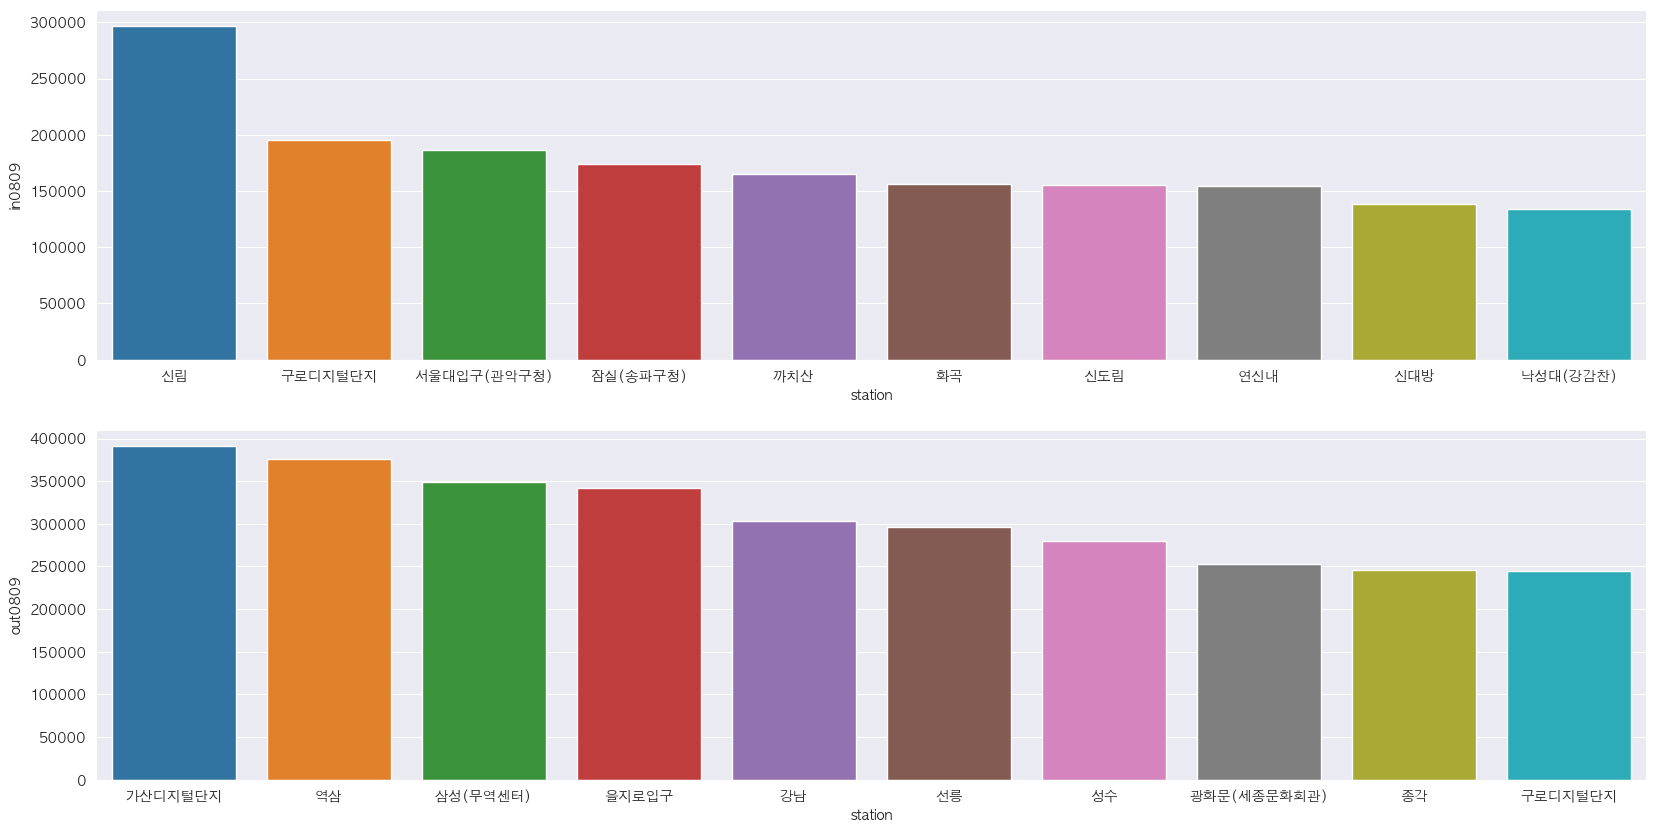

In [59]:
# 출근시간 승.하차 Top10

seoul_map2 =folium.Map(location=[37.5642135, 127.0016985], zoom_start=11)

# 승차 top10
gowork_in = data.loc[data['month'] == 202211, ['station', 'line', 'in0809']].sort_values('in0809', ascending=False).head(10)

# 하차 top10
gowork_out = data.loc[data['month'] == 202211, ['station', 'line', 'out0809']].sort_values('out0809', ascending=False).head(10)

# 그래프 옵션 조정
fig, ax = plt.subplots(nrows=2, figsize=(20, 10))

# 그래프 작성
sns.barplot(gowork_in, x='station', y='in0809', ax=ax[0])
sns.barplot(gowork_out, x='station', y='out0809', ax=ax[1])

# 승하차 top10 df <-> 역 위치 정보 df join
gowork_in_loc = pd.merge(gowork_in, location, on=['station', 'line'])
gowork_out_loc = pd.merge(gowork_out, location, on=['station', 'line'])

print(gowork_in_loc)
print(gowork_out_loc)

# CircleMark
for i in range(0, len(gowork_in_loc)):
    loc = (gowork_in_loc.iloc[i, 5], gowork_in_loc.iloc[i, 4])
    folium.CircleMarker(loc, radius=float(gowork_in_loc.iloc[i, 2]/10000), popup=gowork_in_loc.iloc[i, 1], color='blue',fill=True, fill_opacity=0.5).add_to(seoul_map2)

for i in range(0, len(gowork_out_loc)):
    loc = (gowork_out_loc.iloc[i, 5], gowork_out_loc.iloc[i, 4])
    folium.CircleMarker(loc, radius=float(gowork_out_loc.iloc[i, 2]/10000), popup=gowork_out_loc.iloc[i, 1], color='coral', fill=True, fill_opacity=0.5).add_to(seoul_map2)

# print map
seoul_map2